# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [333]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
#import numpy.random as rnd

%matplotlib inline

In [334]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [335]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [336]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [337]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [338]:
# Using the Python requests library, make an API call to access the current price of BTC

try:
    # Use the json.dumps function to review the response data from the API call
    btc_response = requests.get(btc_url).json()

    #Not required but alwasys good habit to add exception handling on API call
except Exception as error:
    print(f"Unable to connect to the server at url: {btc_url}.\nError:\n{error}")

finally:
    # Use the indent and sort_keys parameters to make the response object readable
    print(json.dumps(btc_response, indent = 4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18853450,
            "id": 1,
            "last_updated": 1635133166,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1170299038390,
                    "percent_change_1h": 0.0556607759213262,
                    "percent_change_24h": 0.675262814971904,
                    "percent_change_7d": 0.661754705933066,
                    "percentage_change_1h": 0.0556607759213262,
                    "percentage_change_24h": 0.675262814971904,
                    "percentage_change_7d": 0.661754705933066,
                    "price": 61991.0,
                    "volume_24h": 31408839467
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18853450,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [339]:
# Using the Python requests library, make an API call to access the current price ETH

try:
    # Use the json.dumps function to review the response data from the API call
    eth_response = requests.get(eth_url).json()

    #Not required but alwasys good habit to add exception handling on API call
except Exception as error:
    print(f"Unable to connect to the server at url: {eth_url}.\nError:\n{error}")

finally:
    # Use the indent and sort_keys parameters to make the response object readable
    print(json.dumps(eth_response, indent = 4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 118065667,
            "id": 1027,
            "last_updated": 1635133160,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 488469512068,
                    "percent_change_1h": -0.0933890843310286,
                    "percent_change_24h": -0.723191264110741,
                    "percent_change_7d": 7.20423561663673,
                    "percentage_change_1h": -0.0933890843310286,
                    "percentage_change_24h": -0.723191264110741,
                    "percentage_change_7d": 7.20423561663673,
                    "price": 4131.89,
                    "volume_24h": 16804660636
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 118065667,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypto

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [340]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
# Print the current price of BTC
print(f"current price of BTC: ${btc_price:.02f}")

current price of BTC: $61991.00


In [341]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
# Print the current price of ETH
print(f"current price of ETH: ${eth_price:.02f}")

current price of ETH: $4131.89


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [342]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"current holding value of BTC: ${btc_value:.02f}")


current holding value of BTC: $74389.20


In [343]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"current holding value of ETH: ${eth_value:.02f}")

current holding value of ETH: $21899.02


In [344]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value 

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"Total value of Cryptcurrency wallet: ${total_crypto_wallet:.02f}")

Total value of Cryptcurrency wallet: $96288.22


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [345]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [346]:
# Set the variables for the Alpaca API and secret keys
load_dotenv()
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca_api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [347]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
today = pd.Timestamp("2021-10-23", tz="America/New_York").isoformat()

# Set both the start and end date at the date of your prior weekday 
start = pd.Timestamp("2021-10-18", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-22", tz="America/New_York").isoformat()

# Set limit_rows to 1000
limit_rows = 1000
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
df_portfolio_priorweekday = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df

# Display sample data
df_portfolio_priorweekday.head(10)

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-10-18 00:00:00-04:00  114.33  114.5600  114.2500  114.49  5145953   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.1600  114.18  3999066   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.07  5881766   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-10-18 00:00:00-04:00  443.97  447.550  443.27  447.22  51994387  
2021-10-19 00:00:00-04:00  448.92  450.700  448.27  450.68  40790864  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39  41594298  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [348]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
#spy = alpaca_api.get_barset('SPY', 'day').df
#agg = alpaca_api.get_barset('AGG', 'day').df
df_portfolio_current = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = start,
    end = today,
    limit = limit_rows
).df

# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of SPY and AGG
df_closing_prices["SPY"] = df_portfolio_current["SPY"]["close"]
df_closing_prices["AGG"] = df_portfolio_current["AGG"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# for current price - sort the index (date) descending 
df_closing_prices = df_closing_prices.sort_index(ascending=False)

#Review the first 5 rows of the Alpaca DataFrame
df_closing_prices.head(5)


,SPY,AGG
2021-10-22,453.13,114.07
2021-10-21,453.61,113.85
2021-10-20,452.39,114.07
2021-10-19,450.68,114.18
2021-10-18,447.22,114.49


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [349]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_closing_prices['AGG'].iloc[0])

# Print the AGG closing price
# YOUR CODE HERE
print(f"Closing price of AGG (A/O: {df_closing_prices.index[0]}): ${agg_close_price :.02f}")

Closing price of AGG (A/O: 2021-10-22): $114.07


In [350]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_closing_prices['SPY'].iloc[0])


# Print the SPY closing price
print(f"Closig price of SPY (A/O: {df_closing_prices.index[0]}): ${spy_close_price :.02f}")

Closig price of SPY (A/O: 2021-10-22): $453.13


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [351]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"Current value of the bond portfolio (A/O: {df_closing_prices.index[0]}): ${agg_value :.02f}")


Current value of the bond portfolio (A/O: 2021-10-22): $22814.00


In [352]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"Current value of the stock portfolio (A/O: {df_closing_prices.index[0]}): ${spy_value  :.02f}")


Current value of the stock portfolio (A/O: 2021-10-22): $49844.30


In [353]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Current balance - the stock and bond portion of the portfolio (A/O: {df_closing_prices.index[0]}): ${total_stocks_bonds :.02f}")


Current balance - the stock and bond portion of the portfolio (A/O: 2021-10-22): $72658.30


In [354]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet 

# Print current cryptocurrency wallet balance
print(f"Current total balance of the portfolio (stock+bond+crypto): ${total_portfolio :.02f}")

Current total balance of the portfolio (stock+bond+crypto): $168946.52


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [355]:
# Consolidate financial assets data into a Python list
savings_data = []
savings_data.append(total_crypto_wallet)
savings_data.append(total_stocks_bonds)


# Review the Python list savings_data
savings_data
    

[96288.217, 72658.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [356]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, index = ['crypto','stock/bond'],columns=['amount'])
# Display the savings_df DataFrame
savings_df


,amount
crypto,96288.217
stock/bond,72658.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

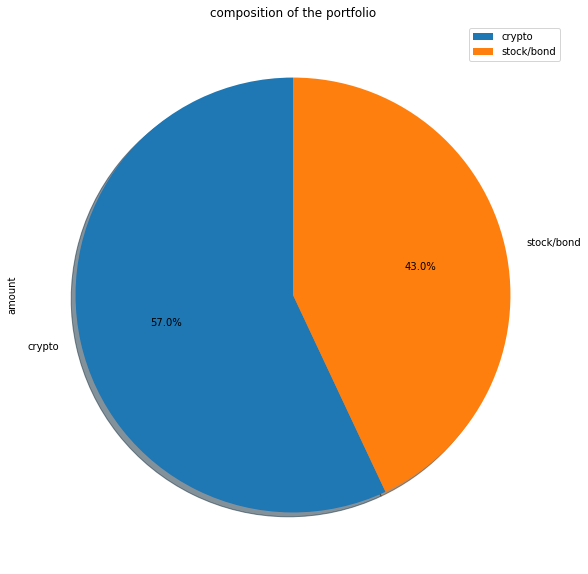

In [357]:
ax = savings_df.plot(figsize=(20,10), kind='pie', y='amount', shadow=True, autopct = '%1.1f%%', startangle=90, labels = savings_df.index, legend = True, title = 'composition of the portfolio')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [358]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income  * 3  
print(f"Emergency fund value: ${emergency_fund_value:.02f}")

Emergency fund value: $36000.00


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [359]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
print(f"- Total portfolio balance: \t${total_portfolio :.02f}")
print(f"- Emergency fund value:    \t${emergency_fund_value:.02f}")
print("----------------------------------------")
if emergency_fund_value < total_portfolio:
    print("Congratulations! You have enough money in this fund")
elif emergency_fund_value == total_portfolio:
    print("Congratulations! reaching this important financial goal")
else:
    print(f"${(emergency_fund_value - total_portfolio): .02f} is away from reaching the goal")

- Total portfolio balance: 	$168946.52
- Emergency fund value:    	$36000.00
----------------------------------------
Congratulations! You have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [360]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# Set the tickers for both the bond and stock portion of the portfolio
#tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
#timeframe = "1D"

# Format current date as ISO format
today = pd.Timestamp("2021-10-23", tz="America/New_York").isoformat()

# Set both the start and end date at the date of your prior weekday 
start = pd.Timestamp("2018-10-22", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-22", tz="America/New_York").isoformat()

# Set limit_rows to 3000
limit_rows = 1000
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07



In [361]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
df_portfolio_threeyears = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df

# Display sample data

#1) as default 
df_portfolio_threeyears
#as default, the abve will Display both the first and last five rows of the DataFrame automatically

#2) But if we were asked to select and show first and last 5 rows only manually
pd.concat([df_portfolio_threeyears[:5],df_portfolio_threeyears[-5:]])


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2018-10-22 00:00:00-04:00  104.47  104.5200  104.3400  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.7400  104.4750  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.8100  104.6700  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.7700  104.6100  104.665  3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.0500  104.8700  104.915  4411985.0   
2021-10-18 00:00:00-04:00  114.33  114.5600  114.2500  114.490  5145953.0   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.1600  114.180  3999066.0   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.070  5881766.0   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.850  4741154.0   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.070  3309637.0   

                              SPY                                      
                             open     high     low   close     volume  
time                                                                   
2018-10-22 00:00:00-04:00  277.00  277.360  274.41  275.06   64990700  
2018-10-23 00:00:00-04:00  270.94  274.870  268.61  273.54  113790534  
2018-10-24 00:00:00-04:00  273.33  273.760  264.70  265.22  130172487  
2018-10-25 00:00:00-04:00  267.37  271.810  266.23  270.14   97215770  
2018-10-26 00:00:00-04:00  265.92  271.000  262.29  265.29  161147868  
2021-10-18 00:00:00-04:00  443.97  447.550  443.27  447.22   51994387  
2021-10-19 00:00:00-04:00  448.92  450.700  448.27  450.68   40790864  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39   41594298  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61   33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13   50771701

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [362]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
thirty_years_simulation = MCSimulation(
    portfolio_data=df_portfolio_threeyears,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252*30,
)

# Review the simulation input data
thirty_years_simulation.portfolio_data.head()

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.05  104.870  104.915  4411985.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-22 00:00:00-04:00          NaN  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   

                                                   
                              volume daily_return  
time                                               
2018-10-22 00:00:00-04:00   64990700          NaN  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551  
2018-10-26 00:00:00-04:00  161147868    -0.017954

In [363]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_years_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007444,0.996950,0.997947,0.995143,1.006821,0.999853,0.994840,0.998458,1.000195,0.993760,...,0.999769,0.992358,1.005552,0.993931,1.011544,1.007088,1.005146,1.010720,1.009121,0.995734
2,1.005743,1.006022,1.013996,0.990611,1.004327,0.995560,0.995775,0.990331,0.997949,0.992217,...,1.003642,0.998020,1.001083,0.990190,1.017409,1.012454,1.009730,1.015410,1.002415,0.986062
3,0.999316,1.022361,1.022471,0.996268,0.993605,0.990054,0.995753,0.985062,1.006365,0.979589,...,1.005193,1.002074,1.031781,0.985066,1.014267,1.010443,1.001065,1.017595,0.986379,0.977684
4,0.983859,1.019774,1.029245,0.992484,1.012624,1.005341,1.006261,0.990419,0.997094,0.992028,...,1.012173,1.016461,1.030904,0.980813,1.007239,1.009512,1.005990,1.016108,0.995601,0.983359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,43.715152,78.926470,25.675684,46.419668,69.312623,10.424874,45.892823,29.372050,32.457926,9.304004,...,150.542412,33.024835,135.533217,39.923876,51.171925,15.198053,39.947548,6.565435,26.256366,26.485543
7557,43.797795,78.719658,25.434718,46.294348,69.164421,10.359557,45.378144,29.446033,33.037371,9.283918,...,150.948882,32.958750,135.931453,39.787191,51.272585,15.357394,40.217651,6.514121,26.042033,26.713622
7558,43.623882,79.289171,25.356452,46.615100,69.151613,10.259149,44.882512,29.317979,32.624728,9.156184,...,153.546453,32.664419,139.053715,39.803657,51.349074,15.247681,39.613032,6.483640,25.879696,26.673913
7559,43.540457,79.134667,25.078819,46.553896,69.194542,10.213858,45.109032,29.354644,33.003169,9.241240,...,153.860283,32.453827,137.340672,39.758230,51.950602,15.255024,39.231706,6.495990,26.038906,26.867887


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

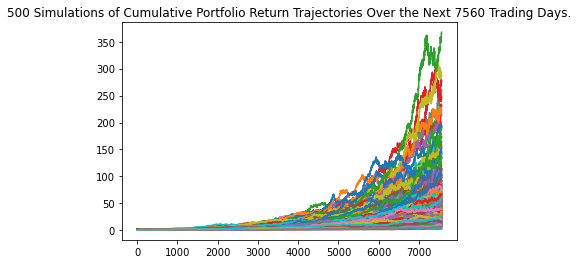

In [364]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
thirty_years_simulation.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

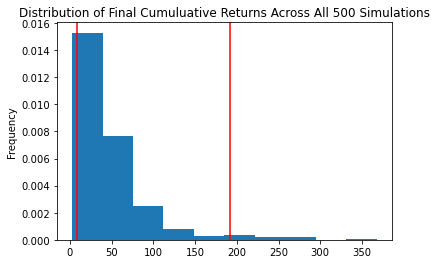

In [365]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
thirty_years_simulation.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [366]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_years_simulation_statistics = thirty_years_simulation.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(thirty_years_simulation_statistics)


count           500.000000
mean             48.504212
std              45.781964
min               2.550101
25%              20.979890
50%              35.581339
75%              59.086875
max             367.522270
95% CI Lower      7.943574
95% CI Upper    191.874899
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [367]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"current balance of the stock and bond portion of the members portfolio (A/O: {df_closing_prices.index[0]}): ${total_stocks_bonds :.02f}")

current balance of the stock and bond portion of the members portfolio (A/O: 2021-10-22): $72658.30


In [368]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(thirty_years_simulation_statistics[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(thirty_years_simulation_statistics[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment stock and bond portion of ${total_stocks_bonds:.02f} in the portfolio"
      f" over the 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return:.02f} and ${ci_upper_thirty_cumulative_return:.02f}.")


There is a 95% chance that an initial investment stock and bond portion of $72658.30 in the portfolio over the 30 years will end within in the range of $577166.57 and $13941303.99.


In [369]:
# CASE1: Split 20% to AGG and 80% to SPY
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
ten_years_simulation = MCSimulation(
    portfolio_data=df_portfolio_threeyears,
    weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252*10,
)

# Review the simulation input data
ten_years_simulation.portfolio_data.head()

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.05  104.870  104.915  4411985.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-22 00:00:00-04:00          NaN  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   

                                                   
                              volume daily_return  
time                                               
2018-10-22 00:00:00-04:00   64990700          NaN  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551  
2018-10-26 00:00:00-04:00  161147868    -0.017954

In [370]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_years_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994118,0.992969,0.992923,1.020299,0.990430,1.010924,0.996163,1.010557,1.007143,1.007275,...,1.006636,0.994252,0.982798,0.994266,1.001120,0.998038,0.988474,1.012385,0.998841,1.011013
2,0.994463,1.000779,0.994354,1.017158,0.979618,0.995226,1.009216,1.010121,0.995654,1.022360,...,1.025875,1.006384,0.993793,1.003454,1.012361,1.004370,0.976138,0.997904,1.010658,1.006266
3,0.992681,1.009074,1.000797,1.038635,0.978198,0.981227,1.004134,1.009589,0.996067,1.023992,...,1.037451,1.026917,1.006762,0.972098,1.020867,0.994508,0.981334,0.976588,1.029331,1.014739
4,0.993430,1.021078,0.990164,1.043144,0.989592,0.982478,1.007986,1.011934,1.006317,1.034125,...,1.051757,1.030268,1.012335,0.975558,1.016952,0.994280,0.963287,0.985272,1.031828,1.031922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.794457,4.880002,2.964668,2.570378,3.175551,3.449522,4.587811,4.423114,5.903425,6.064141,...,2.905211,3.049942,4.867343,5.316384,5.422507,4.490973,2.437498,10.124741,2.246733,14.609059
2517,3.913757,4.967521,3.013076,2.565877,3.193220,3.533854,4.599613,4.380525,5.979949,6.014603,...,2.839008,3.077844,4.817898,5.310453,5.408491,4.535577,2.483685,10.202911,2.269654,14.610140
2518,3.881444,4.977055,3.003626,2.577095,3.193918,3.491329,4.638923,4.336962,5.898458,5.993347,...,2.890875,3.031071,4.778660,5.348779,5.486774,4.551875,2.542671,10.203695,2.255205,14.748146
2519,3.921048,4.979769,2.915410,2.520664,3.173833,3.553322,4.633785,4.457035,5.904137,5.949631,...,2.908307,3.074705,4.774901,5.324652,5.511658,4.467263,2.531568,10.123785,2.239946,14.340174


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

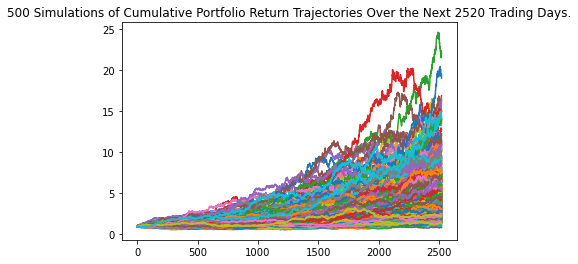

In [371]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_years_simulation.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

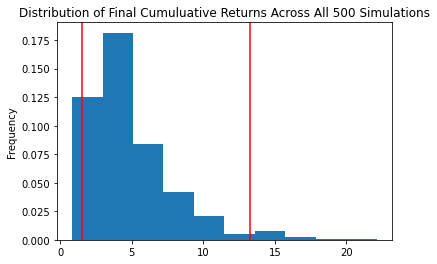

In [372]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_years_simulation.plot_distribution()

In [373]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_years_simulation_statistics = ten_years_simulation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(ten_years_simulation_statistics)

count           500.000000
mean              4.900635
std               3.006681
min               0.827869
25%               2.872712
50%               4.148144
75%               6.315772
max              22.102925
95% CI Lower      1.491652
95% CI Upper     13.237712
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [374]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"current balance of the stock and bond portion of the members portfolio (A/O: {df_closing_prices.index[0]}): ${total_stocks_bonds :.02f}")

current balance of the stock and bond portion of the members portfolio (A/O: 2021-10-22): $72658.30


In [375]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_years_simulation_statistics[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(ten_years_simulation_statistics[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment stock and bond portion of ${total_stocks_bonds:.02f} in the portfolio"
      f" over the 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:.02f} and ${ci_upper_ten_cumulative_return:.02f}.")



There is a 95% chance that an initial investment stock and bond portion of $72658.30 in the portfolio over the 10 years will end within in the range of $108380.92 and $961829.67.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [376]:
# CASE2: Split 80% to AGG and 20% to SPY
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
ten_years_simulation = MCSimulation(
    portfolio_data=df_portfolio_threeyears,
    weights=[0.80, 0.20],
    num_simulation=500,
    num_trading_days=252*10,
)

# Review the simulation input data
ten_years_simulation.portfolio_data.head()

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.05  104.870  104.915  4411985.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-22 00:00:00-04:00          NaN  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   

                                                   
                              volume daily_return  
time                                               
2018-10-22 00:00:00-04:00   64990700          NaN  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551  
2018-10-26 00:00:00-04:00  161147868    -0.017954

In [377]:
ten_years_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996887,0.997482,1.001984,0.997977,0.995597,0.994558,0.995782,1.000336,0.999294,1.002189,...,1.000531,0.996324,1.001366,0.992905,0.996936,0.999204,1.003436,0.999480,0.997144,1.000050
2,0.997686,1.000394,0.993155,0.998882,1.004509,0.991480,0.996776,1.008203,1.001089,0.996811,...,1.001881,0.990607,0.995803,0.987970,0.993513,0.999344,1.008435,0.996189,0.995903,1.003409
3,0.997230,0.999386,0.994778,1.005606,1.004330,0.991790,0.997784,1.017538,0.994664,0.991595,...,1.006638,0.994334,0.996461,0.987715,0.999576,0.997902,1.010560,1.002140,0.990278,1.008583
4,1.000709,0.997298,0.995242,1.008244,1.004722,0.994794,0.987414,1.017984,1.000066,0.992290,...,1.008264,0.996048,0.992801,0.981674,0.995248,1.000162,1.009969,1.010798,0.985207,1.002889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.361288,1.884002,1.429202,2.521514,1.991955,1.920967,1.893403,2.114246,1.387479,1.402558,...,1.800647,1.687383,1.984770,2.235331,1.485155,1.972266,2.530539,2.163027,1.798475,1.887666
2517,1.363289,1.877011,1.429491,2.487768,1.985037,1.919240,1.907028,2.109914,1.388431,1.391591,...,1.798061,1.691122,1.996108,2.238021,1.488076,1.964958,2.540998,2.154195,1.803864,1.892445
2518,1.359871,1.877274,1.433744,2.488851,1.984450,1.915936,1.910492,2.106220,1.390070,1.388642,...,1.792611,1.686779,1.997053,2.234043,1.494852,1.965285,2.535874,2.155741,1.811007,1.902511
2519,1.357766,1.889594,1.434127,2.463241,1.985007,1.925078,1.918778,2.109980,1.391272,1.388777,...,1.800302,1.684260,2.005833,2.238472,1.500660,1.961851,2.533607,2.142450,1.791479,1.916048


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

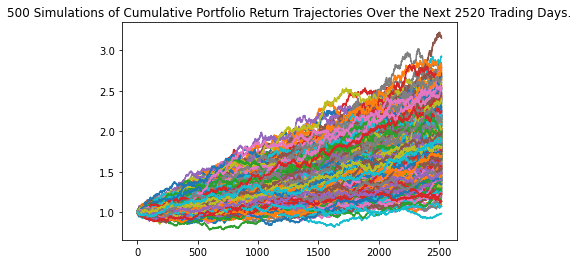

In [378]:
ten_years_simulation.plot_simulation()

In [379]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_years_simulation_statistics = ten_years_simulation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(ten_years_simulation_statistics)

count           500.000000
mean              1.852017
std               0.367268
min               0.983101
25%               1.594401
50%               1.828139
75%               2.037474
max               3.152248
95% CI Lower      1.221775
95% CI Upper      2.679816
Name: 2520, dtype: float64


In [380]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_years_simulation_statistics[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(ten_years_simulation_statistics[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment stock and bond portion of ${total_stocks_bonds:.02f} in the portfolio"
      f" over the 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:.02f} and ${ci_upper_ten_cumulative_return:.02f}.")


There is a 95% chance that an initial investment stock and bond portion of $72658.30 in the portfolio over the 10 years will end within in the range of $88772.10 and $194710.86.
